In [1]:
import numpy as np
from pylab import mpl, plt

In [2]:
def f(x):
    return 2 * x ** 2 - x ** 3 / 3 

In [3]:
x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [4]:
y = f(x)
y

array([10.66666667,  7.91145833,  5.625     ,  3.77604167,  2.33333333,
        1.265625  ,  0.54166667,  0.13020833,  0.        ,  0.11979167,
        0.45833333,  0.984375  ,  1.66666667,  2.47395833,  3.375     ,
        4.33854167,  5.33333333,  6.328125  ,  7.29166667,  8.19270833,
        9.        ,  9.68229167, 10.20833333, 10.546875  , 10.66666667])

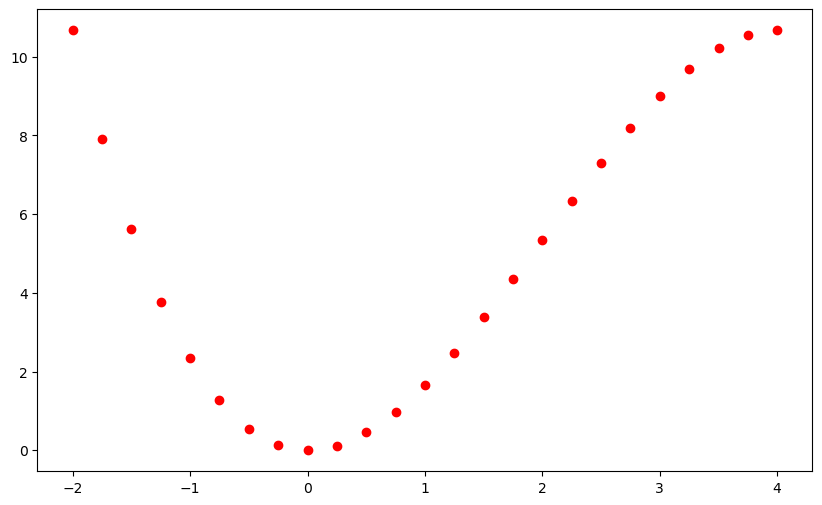

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro')

In [6]:
beta = np.cov(x, y, ddof=0)[0, 1] / np.var(x)
beta

1.0541666666666667

In [7]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [8]:
y_ = alpha + beta * x

In [9]:
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

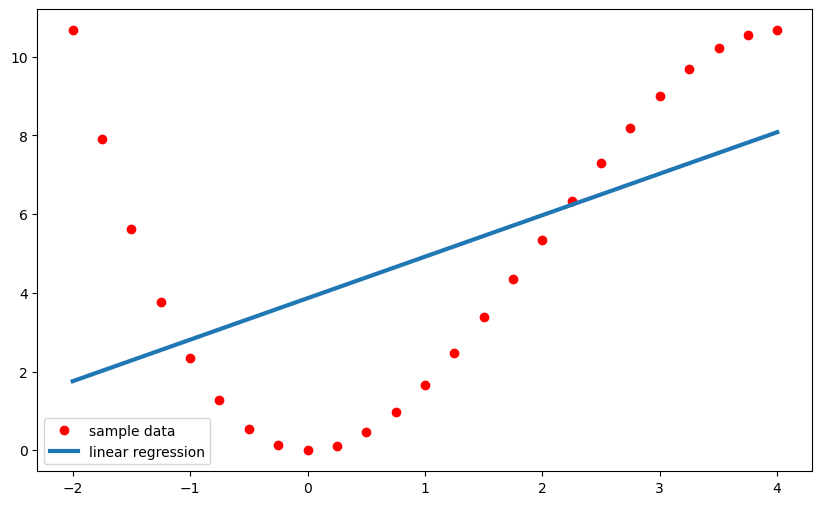

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend();

deg=1 | MSE=10.72195
deg=2 | MSE=2.31258
deg=3 | MSE=0.00000


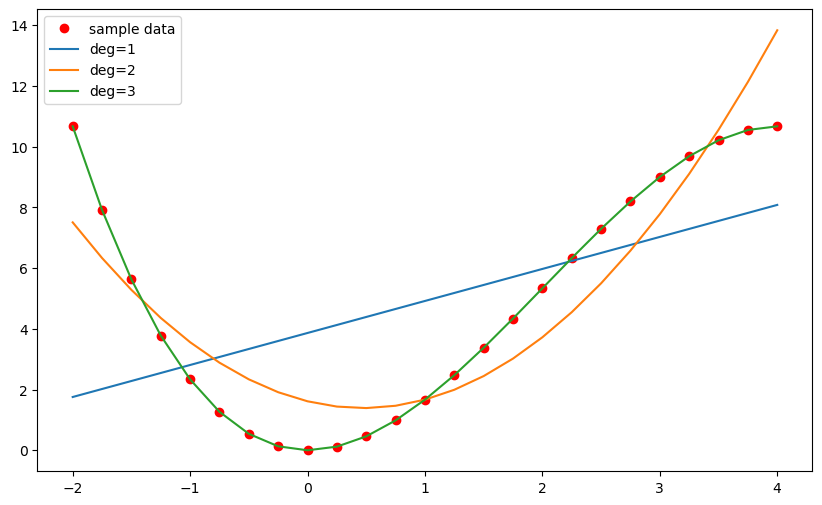

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();


In [12]:
reg

array([-3.33333333e-01,  2.00000000e+00,  3.17114642e-15, -6.98371187e-15])

In [13]:
from sklearn.neural_network import MLPRegressor

In [14]:
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)

In [15]:
model.fit(x.reshape(-1, 1), y)

MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)

In [16]:
y_ = model.predict(x.reshape(-1, 1))

In [17]:
MSE = ((y - y_) ** 2).mean()
MSE

0.010175001867389628

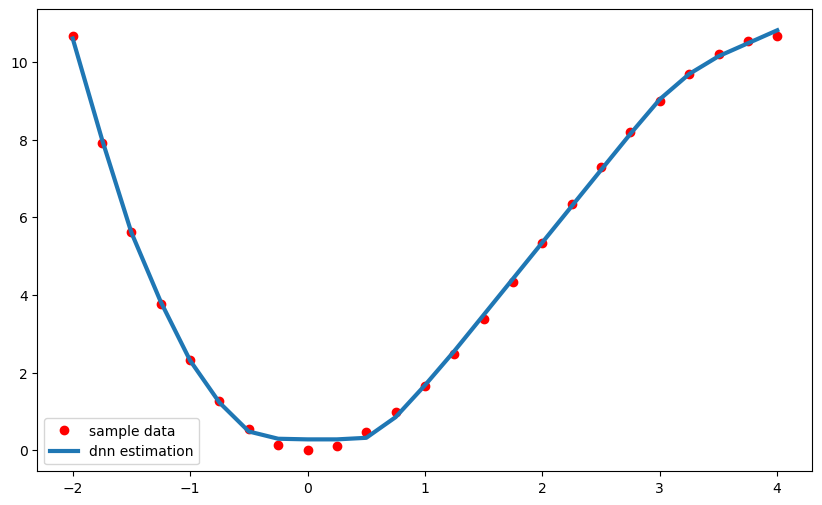

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend();

In [19]:
import tensorflow as tf
tf.random.set_seed(100)

2023-03-12 16:30:10.582030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 16:30:11.250763: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 16:30:11.250826: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 16:30:13.889842: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [20]:
from keras.layers import Dense
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')


2023-03-12 16:30:16.604733: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-12 16:30:16.604786: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-12 16:30:16.604828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anitha-lenovo): /proc/driver/nvidia/version does not exist
2023-03-12 16:30:16.605318: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
MSE = ((y - y_) ** 2).mean()
MSE

0.010175001867389628

1/1 [==============================] - 0s 133ms/step
round=1 | MSE=3.31775
1/1 [==============================] - 0s 65ms/step
round=2 | MSE=0.80898
1/1 [==============================] - 0s 30ms/step
round=3 | MSE=0.24458
1/1 [==============================] - 0s 27ms/step
round=4 | MSE=0.12288
1/1 [==============================] - 0s 73ms/step
round=5 | MSE=0.09160


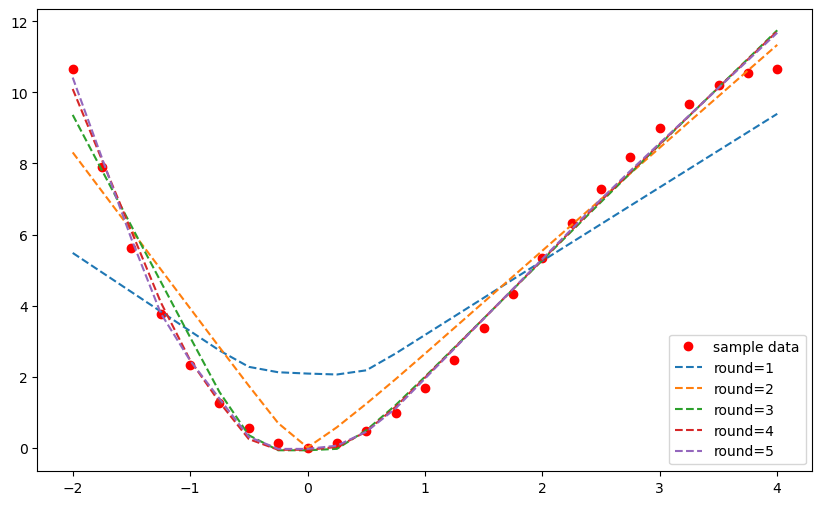

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 6):
    model.fit(x, y, epochs=100, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend()

Another example with fully random datasaet. First try with OLS regression

In [24]:
np.random.seed(0)
x = np.linspace(-1, 1)
y = np.random.random(len(x)) * 2 - 1

deg= 1 | MSE=0.28153
deg= 5 | MSE=0.27331
deg= 9 | MSE=0.25442
deg=11 | MSE=0.23458
deg=13 | MSE=0.22989
deg=15 | MSE=0.21672


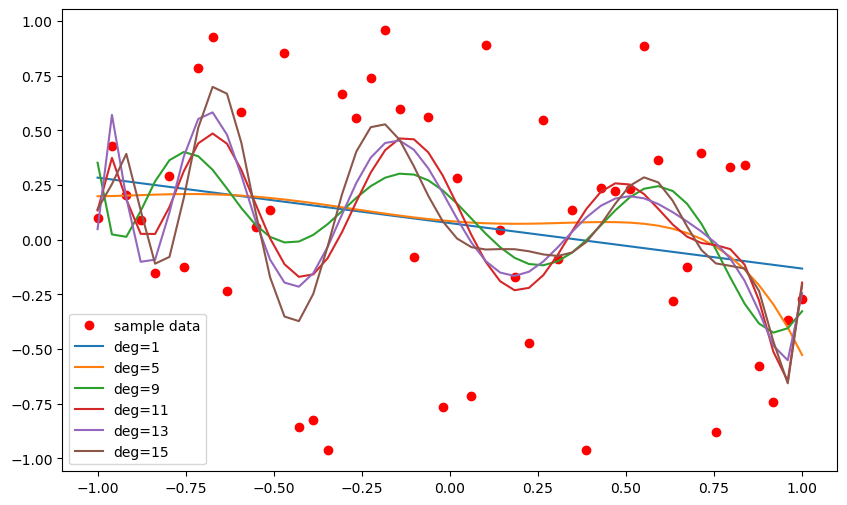

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for deg in [1, 5, 9, 11, 13, 15]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f'deg={deg:2d} | MSE={MSE:.5f}')
    plt.plot(x, np.polyval(reg, x), label=f'deg={deg}')
plt.legend();

Now repeat neural network for the same dataset

In [26]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
for _ in range(3):
    model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


2/2 [==============================] - 0s 4ms/step
round=1 | MSE=0.15160
2/2 [==============================] - 0s 4ms/step
round=2 | MSE=0.12078
2/2 [==============================] - 0s 4ms/step
round=3 | MSE=0.09642
2/2 [==============================] - 0s 4ms/step
round=4 | MSE=0.06981
2/2 [==============================] - 0s 4ms/step
round=5 | MSE=0.04779
2/2 [==============================] - 0s 4ms/step
round=6 | MSE=0.03279
2/2 [==============================] - 0s 5ms/step
round=7 | MSE=0.01419
CPU times: user 59.9 s, sys: 3.99 s, total: 1min 3s
Wall time: 36.3 s


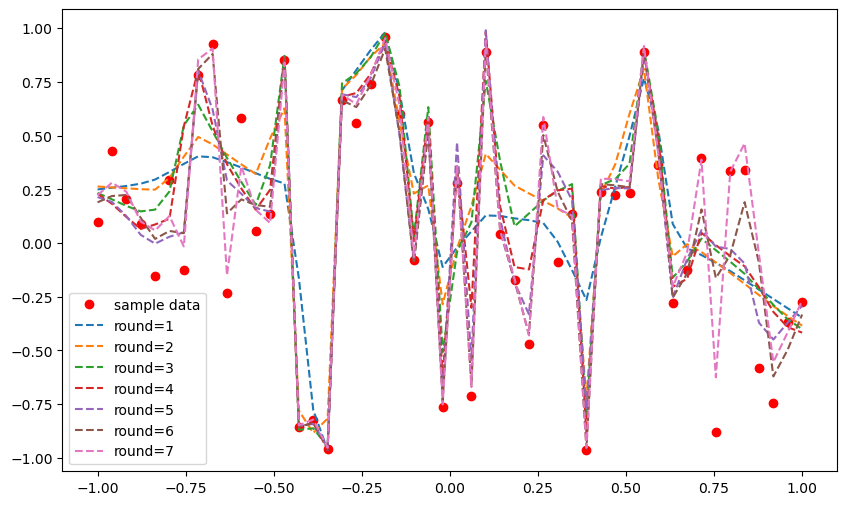

In [28]:
%%time
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
for _ in range(1, 8):
    model.fit(x, y, epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y - y_.flatten()) ** 2).mean()
    print(f'round={_} | MSE={MSE:.5f}')
    plt.plot(x, y_, '--', label=f'round={_}')
plt.legend();

## Classification with Neural Networks

In [29]:
import pandas as pd

In [30]:
f = 5
n = 10

In [43]:
np.random.seed(100)

In [44]:
x = np.random.randint(0, 2, (n, f))
x

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1]])

In [45]:
y = np.random.randint(0, 2, n)
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [46]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=f))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [52]:
model.fit(x, y, epochs=50, verbose=False)

In [48]:
y_ = np.where(model.predict(x).flatten() > 0.5, 1, 0)
y_

1/1 [==============================] - 0s 73ms/step


array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [49]:
y == y_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [53]:
res = pd.DataFrame(model.history.history)
res

,loss,acc
0,0.399408,0.9
1,0.395512,0.9
2,0.391703,0.9
3,0.387906,0.9
4,0.384178,0.9
5,0.380526,0.9
6,0.376889,0.9
7,0.373207,0.9
8,0.369655,0.9
9,0.366068,0.9


<AxesSubplot: >

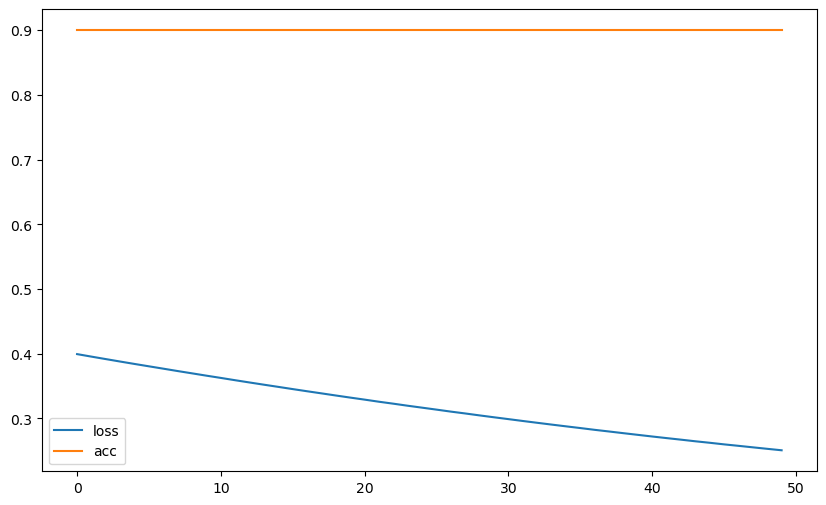

In [54]:
res.plot(figsize=(10, 6))

## Neural Networks
Neural networks are good at learning relationships between input
and output data. They can be applied to a number of problem
types, such as **estimation in the presence of complex relationships
or classification**, for which traditional statistical methods are not
well suited.